# Part 1: NY Taxi Fare Prediction

In [ ]:
!pip install -q kaggle

In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c new-york-city-taxi-fare-prediction

100% 1.56G/1.56G [00:11<00:00, 123MB/s]
100% 1.56G/1.56G [00:11<00:00, 150MB/s]


In [ ]:
!unzip new-york-city-taxi-fare-prediction

Archive:  new-york-city-taxi-fare-prediction.zip
  inflating: GCP-Coupons-Instructions.rtf  
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import random


In [ ]:
train = pd.read_csv("/content/train.csv", nrows = 1000000)
test = pd.read_csv("/content/test.csv")

PART 1 --> DATA CLEANSING

Will perform the following activities
1.   Shape of train and test sets
2.   Check for NaNs and drop them (if any)
3.   Check for outliers and drop them (if any)
4.   Type conversion of relevant fields





In [ ]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
# Check no of rows & columns in the dataset
print("Shape of the Training data :", train.shape)

# See all the columns in the dataset
print("All columns are :", list(train.columns))

Shape of the Training data : (1000000, 8)
All columns are : ['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']


In [ ]:
# Check no of rows & columns in the test dataset
print("Shape of the Testing data :", test.shape)

# See all the columns in the test dataset
print("All columns are :", list(test.columns))

Shape of the Testing data : (9914, 7)
All columns are : ['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']


In [ ]:
# Check datatypes & count of not-null values in each field
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1000000 non-null  object 
 1   fare_amount        1000000 non-null  float64
 2   pickup_datetime    1000000 non-null  object 
 3   pickup_longitude   1000000 non-null  float64
 4   pickup_latitude    1000000 non-null  float64
 5   dropoff_longitude  999990 non-null   float64
 6   dropoff_latitude   999990 non-null   float64
 7   passenger_count    1000000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 61.0+ MB


In [ ]:
#check for missing values in train data
train.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64

In [ ]:
#check for missing values in test data
test.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [ ]:
#drop the missing values
train.dropna(inplace = True)
test.dropna(inplace = True)

In [ ]:
#check the target column
train['fare_amount'].describe()

count    999990.000000
mean         11.347953
std           9.821790
min         -44.900000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

We can see that some values are high near to 500$ which is an outlier

In [ ]:
#Look for no. of non-positive fare_amount values.
train[train["fare_amount"] <= 0]["fare_amount"].count()

67

Many values are negative which is not possible in any case. Dropping those

In [ ]:
# Remove the non-positive fare_amount values.
train.drop(train[train["fare_amount"] <= 0].index , inplace=True)

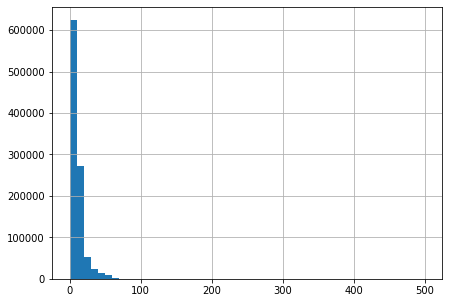

In [ ]:
#Checking Distrubution of fare_amount
train['fare_amount'].hist(bins=50, figsize=(7,5))

In [ ]:
#Removing outliers by taking 25% and 75% and setting up a valid range for fare_amount
q1=train['fare_amount'].quantile(0.25)
q3=train['fare_amount'].quantile(0.75)
upper=q3+3*(q3-q1)
lower=max(q1 - 3*(q3-q1),0)
train.drop( train[train['fare_amount'] > upper].index,inplace = True )
train.drop( train[train['fare_amount'] <= lower].index,inplace = True )

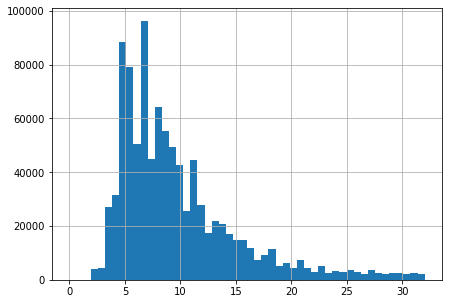

In [ ]:
#Again Checking Distrubution of fare_amount
train['fare_amount'].hist(bins=50, figsize=(7,5))

**Checking passenger column**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


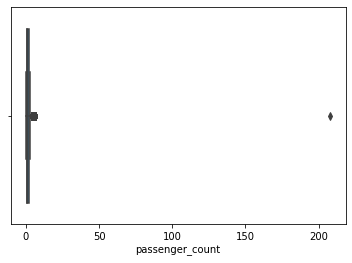

In [ ]:
#Checking distribution of passengers
sns.boxplot(train["passenger_count"])

We can see that some values are extreme far away than rest

Dropping it using same quantile method

In [ ]:
q1=train['passenger_count'].quantile(0.25)
q3=train['passenger_count'].quantile(0.75)
upper=q3+3*(q3-q1)
lower=max(q1 - 3*(q3-q1),0)
train.drop( train[train['passenger_count'] > upper].index,inplace = True )
train.drop( train[train['passenger_count'] <= lower].index,inplace = True )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


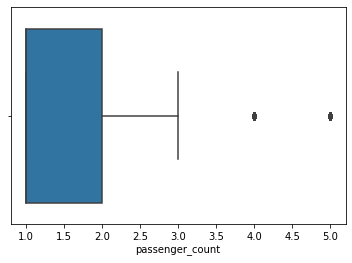

In [ ]:
#Again Checking distribution of passengers
sns.boxplot(train["passenger_count"])

**Next let us explore the pickup latitude and longitudes**,

Googling gave me this info
*   Latitudes range from -90 to 90.
*   Longitudes range from -180 to 180.

The above describe clearly shows some outliers. Let's filter them


In [ ]:
train.drop(train[train['pickup_latitude'] < -90].index , inplace=True)
train.drop(train[train['pickup_latitude'] > 90].index , inplace=True)
train.drop(train[train['dropoff_latitude'] < -90].index , inplace=True)
train.drop(train[train['dropoff_latitude'] > 90].index , inplace=True)
train.drop(train[train['pickup_longitude'] < -180].index , inplace=True)
train.drop(train[train['pickup_longitude'] > 180].index , inplace=True)
train.drop(train[train['dropoff_longitude'] < -180].index , inplace=True)
train.drop(train[train['dropoff_longitude'] > 180].index , inplace=True)

In [ ]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,932161.000000,932161.000000,932161.000000,932161.000000,932161.000000,932161.000000
mean,9.708315,-72.533511,39.935815,-72.536059,39.938554,1.595572
std,5.477676,10.343484,6.045392,10.327084,6.037644,1.153624
min,0.010000,-128.175950,-74.016587,-121.391248,-74.016627,1.000000
25%,6.000000,-73.992273,40.735757,-73.991497,40.734925,1.000000
50%,8.100000,-73.982081,40.752837,-73.980476,40.753377,1.000000
75%,11.700000,-73.968303,40.767014,-73.965030,40.768100,2.000000
max,32.000000,40.812887,69.400000,40.851027,81.510177,5.000000


Watching min and max values of latitudes and longitudes infer that some values are swapped as coordinates of New York are 40.7128° , -74.0060°
So removing the outliers by setting a boundary for coordinates using https://anthonylouisdagostino.com/bounding-boxes-for-all-us-states/ and take a rough bounding box

In [ ]:
train.drop(train[train['pickup_latitude'] > 45].index , inplace=True)
train.drop(train[train['pickup_latitude'] < 40].index , inplace=True)
train.drop(train[train['dropoff_latitude'] > 45].index , inplace=True)
train.drop(train[train['dropoff_latitude'] < 40].index , inplace=True)
train.drop(train[train['pickup_longitude'] > -71].index , inplace=True)
train.drop(train[train['pickup_longitude'] < -79].index , inplace=True)
train.drop(train[train['dropoff_longitude'] > -71].index , inplace=True)
train.drop(train[train['dropoff_longitude'] < -79].index , inplace=True)


In [ ]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,913206.000000,913206.000000,913206.000000,913206.000000,913206.000000,913206.000000
mean,9.711106,-73.978441,40.752218,-73.976425,40.752444,1.595746
std,5.476089,0.035274,0.028424,0.034899,0.031495,1.153453
min,0.010000,-78.669423,40.052722,-78.669423,40.041180,1.000000
25%,6.000000,-73.992485,40.737180,-73.991692,40.736627,1.000000
50%,8.100000,-73.982312,40.753538,-73.980894,40.754071,1.000000
75%,11.700000,-73.969517,40.767415,-73.966568,40.768424,2.000000
max,32.000000,-71.003917,43.213962,-71.003917,44.600000,5.000000


Check the data types of each column

In [ ]:
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [ ]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


key and pickup_datetime seem to contain seem information.
Let's drop key

In [ ]:
 train.drop("key",axis=1,inplace=True)
 test.drop("key",axis=1,inplace=True)

pickup_datetime seem to be datetime column which is in object format. Let's convert them to datetime

In [ ]:
train['pickup_datetime']  = pd.to_datetime(train['pickup_datetime'])

In [ ]:
#Convert for test data
test['pickup_datetime']  = pd.to_datetime(test['pickup_datetime'])

In [ ]:
#check the dtypes after conversion
train.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [ ]:
test.dtypes

pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

Now, for **EDA**. The following are my considerations -
1. Does the number of passengers affect the fare?
2. Does the date and time of pickup affect the fare?
3. Does the day of the week affect the fare?
4. Does the distance travelled affect the fare?

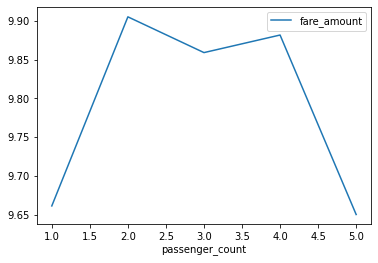

In [ ]:
train[['passenger_count','fare_amount']].groupby('passenger_count').mean().plot()

Any Number of passengers has similar average fare amount. So we can't deduce from it


First, let's split the datetime field 'pickup_datetime' to the following -
* year
* month
* date
* hour
* day of week

Using these we shall calculate the day of the week and come to our conclusions about how pickup_location affects the fare.
Also, create a new field 'distance' to fetch the distance between the pickup and the drop.

We shall create columns for the following -


*   year
*   month
*   date
*   hour
*   day of week






In [ ]:
data = [train,test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

After adding above columns we can drop pickup_datetime

In [ ]:
train.drop('pickup_datetime', axis = 1, inplace = True)
test.drop('pickup_datetime', axis = 1, inplace = True)

Now checking affect of date and time on fare_amount

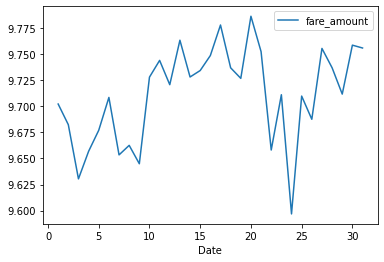

In [ ]:
train[['Date','fare_amount']].groupby('Date').mean().plot()

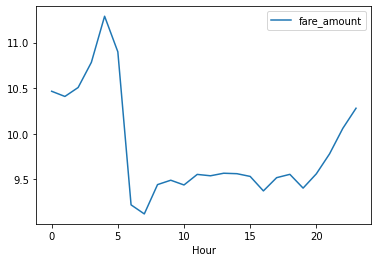

In [ ]:
train[['Hour','fare_amount']].groupby('Hour').mean().plot()

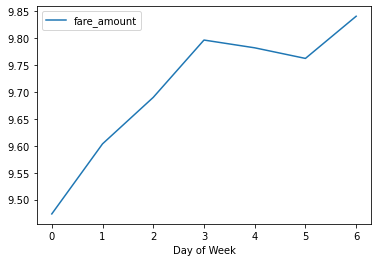

In [ ]:
train[['Day of Week','fare_amount']].groupby('Day of Week').mean().plot()

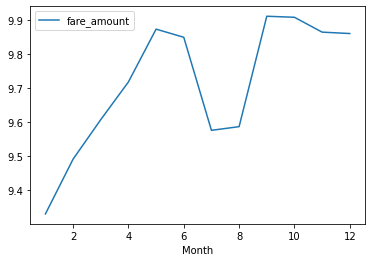

In [ ]:
train[['Month','fare_amount']].groupby('Month').mean().plot()

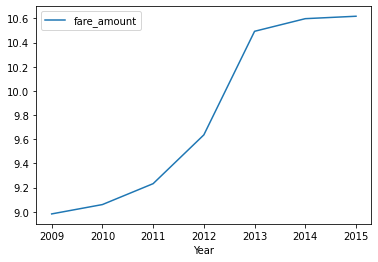

In [ ]:
train[['Year','fare_amount']].groupby('Year').mean().plot()

The above plots gave these information: \\
1. Date doesnot have much impact on fare as the pattern seems random
2. Average fare early morning ( 3:00 to 6:00 ) seems higher that rest of day
3. Average fare seem to increases as week progresses from Monday to Sunday
4. In case of months it is higher in extreme weather like summer and winter in months of May, June and Sept, Oct, Nov, Dec.
5. There is near linear increase in price as years pass on

Based on result number two we can create a new feature which decides whether it's a high price time or low

In [ ]:
def timeofday(x):
  if x > 6 or x < 3:
    return 1
  else:
    return 2

train["timeofday"] = train["Hour"].apply(timeofday)
test["timeofday"] = test["Hour"].apply(timeofday)

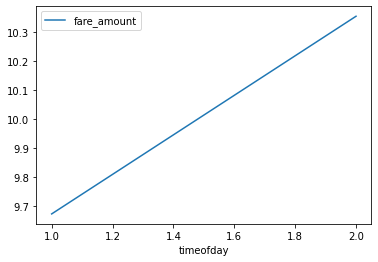

In [ ]:
train[['timeofday','fare_amount']].groupby('timeofday').mean().plot()

Based result number 3 , Thursday Friday and Saturday have similar prices so we can create a OrdinalEncoding based on result

In [ ]:
def dayofweek(x):
  if x < 3 :
    return x + 1
  if x in [3,4,5] :
    return 4
  if x == 6:
    return 5
train['dayofweek'] = train["Day of Week"].apply(dayofweek)
test['dayofweek'] = test["Day of Week"].apply(dayofweek)

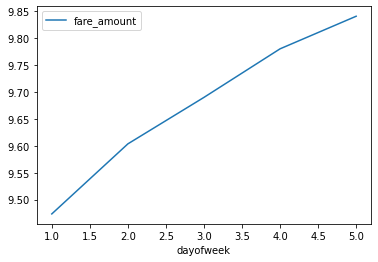

In [ ]:
train[['dayofweek','fare_amount']].groupby('dayofweek').mean().plot()

We don't need Day of Week any more

In [ ]:
train.drop('Day of Week', axis = 1, inplace = True)
test.drop('Day of Week', axis = 1, inplace = True)

Based on result 4 Ordinal encoding of Months

In [ ]:
def monthofyear(x):
  if x in [5,6,9,10,11,12] :
    return 2
  else :
    return 1
train['monthofyear'] = train["Month"].apply(monthofyear)
test['monthofyear'] = test["Month"].apply(monthofyear)

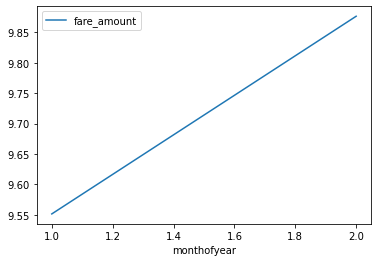

In [ ]:
train[['monthofyear','fare_amount']].groupby('monthofyear').mean().plot()

In [ ]:
train.drop('Month', axis = 1, inplace = True)
test.drop('Month', axis = 1, inplace = True)

Rest of columns we can leave it as it is.

We can calulate the distance in a sphere when latitudes and longitudes are given by [Haversine formula](https://en.wikipedia.org/wiki/Haversine_formula)

**haversine(θ) = sin²(θ/2)**

Eventually, the formual boils down to the following where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).

**a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)**

**c = 2 * atan2( √a, √(1−a) )**

**d = R ⋅ c**

**d = Haversine distance**

*Refer [this](https://community.esri.com/groups/coordinate-reference-systems/blog/2017/10/05/haversine-formula) page for more info and examples on Haversine formula*

Is this distance equal to the road travel distance? Do we have to do something else?


In [ ]:
def haversine_distance(lat1, long1, lat2, long2,i):
    R = 6371  #radius of earth in kilometers
    phi1 = np.radians(i[lat1])
    phi2 = np.radians(i[lat2])

    delta_phi = np.radians(i[lat2]-i[lat1])
    delta_lambda = np.radians(i[long2]-i[long1])

    #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
    a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2

    #c = 2 * atan2( √a, √(1−a) )
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))

    #d = R*c
    d = (R * c) #in kilometers
    i['H_Distance'] = d
    return d

In [ ]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude',train)
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude',test)

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
          ...    
9909     2.124874
9910     3.270969
9911    19.183941
9912     8.343486
9913     1.180825
Length: 9914, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


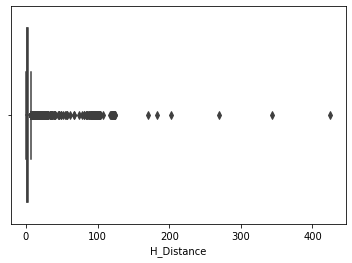

In [ ]:
#Checkin Distribution Haversine Distance
sns.boxplot(train['H_Distance'])

In [ ]:
q1=train['H_Distance'].quantile(0.25)
q3=train['H_Distance'].quantile(0.75)
upper=q3+3*(q3-q1)
lower=max(q1-3*(q3-q1),0)

train.drop( train[train['H_Distance'] > upper].index,inplace = True )
train.drop( train[train['H_Distance'] <= lower].index,inplace = True )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


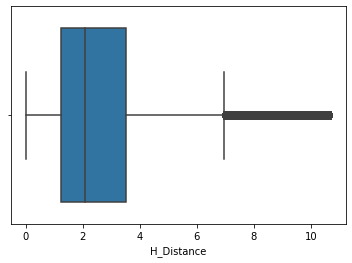

In [ ]:
#Again Checkin Distribution Haversine Distance
sns.boxplot(train['H_Distance'])

In [ ]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Date,Hour,timeofday,dayofweek,monthofyear,H_Distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,15,17,1,1,2,1.030764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,5,16,1,2,1,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,18,0,1,4,1,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,21,4,2,4,1,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,9,7,1,2,1,1.999157


**1. Does the distance affect the fare?**

Checking correlation between columns by creating a heatmap

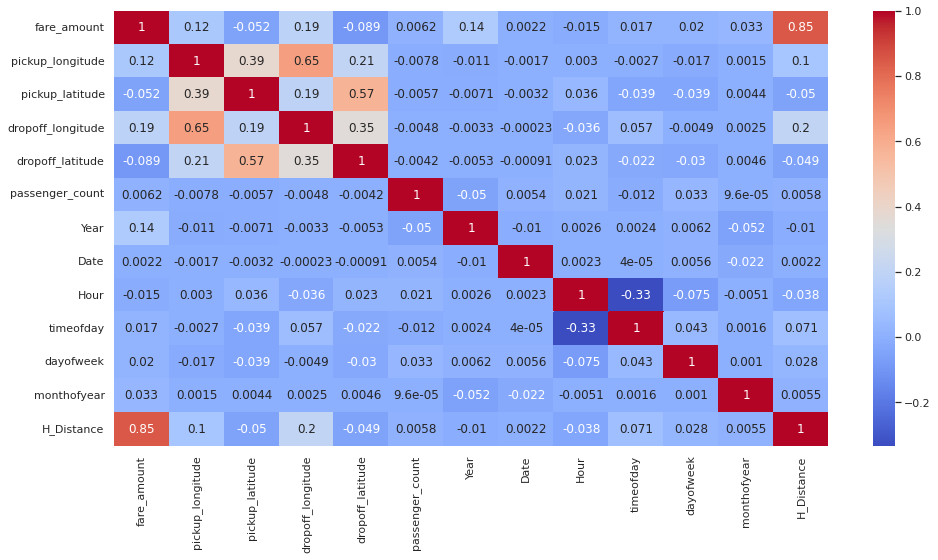

In [ ]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(train.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

The heatmap clearly shows H_Distance have a very high correlation with fare

Implementing train test split function

In [ ]:
def cross(data,fare,k,v):
  size = data.shape[0] // k
  d = []
  y = []
  for i in range(k-1):
    d.append(data[i*size : (i+1)*size])
    y.append(fare[i*size : (i+1)*size])
  d.append(data[(k-1)*size:])
  y.append(fare[(k-1)*size:])
  test = d.pop(v)
  y_test = y.pop(v)
  train = pd.concat(d)
  y_train = pd.concat(y)
  return train,test,y_train,y_test

**Creating a pipeline**

In [ ]:
train = pd.read_csv("/content/train.csv", nrows = 1000000)
test = pd.read_csv("/content/test.csv")

The preprocessing and cleaning of data done abpve will be done using a Imputer function


A scaler is also created so all the values are mappeed to 0 to 1 for stable computation

In [ ]:
class SimpleImputer:
  def __init__(self):
    pass
  def fit(self, X ,y=None):
    self.X = X
    self.y= y
    self.X.dropna(inplace = True)
    self.X.drop(self.X[self.X['pickup_latitude'] > 45].index , inplace=True)
    self.X.drop(self.X[self.X['pickup_latitude'] < 40].index , inplace=True)
    self.X.drop(self.X[self.X['dropoff_latitude'] > 45].index , inplace=True)
    self.X.drop(self.X[self.X['dropoff_latitude'] < 40].index , inplace=True)
    self.X.drop(self.X[self.X['pickup_longitude'] > -71].index , inplace=True)
    self.X.drop(self.X[self.X['pickup_longitude'] < -79].index , inplace=True)
    self.X.drop(self.X[self.X['dropoff_longitude'] > -71].index , inplace=True)
    self.X.drop(self.X[self.X['dropoff_longitude'] < -79].index , inplace=True)
    haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude',self.X)
    self.X.drop("pickup_latitude",axis = 1,inplace = True)
    self.X.drop("pickup_longitude",axis = 1,inplace = True)
    self.X.drop("dropoff_latitude",axis = 1,inplace = True)
    self.X.drop("dropoff_longitude",axis = 1,inplace = True)
    self.X.drop("key",axis=1,inplace=True)
    for i in self.X:
      if i!= 'pickup_datetime':
        self.transform(i)
    self.X['pickup_datetime']  = pd.to_datetime(self.X['pickup_datetime'])
    self.X['Year'] = self.X['pickup_datetime'].dt.year
    self.X['Month'] = self.X['pickup_datetime'].dt.month
    self.X['Date'] = self.X['pickup_datetime'].dt.day
    self.X['Day of Week'] = self.X['pickup_datetime'].dt.dayofweek
    self.X['Hour'] = self.X['pickup_datetime'].dt.hour
    self.X.drop('pickup_datetime', axis = 1, inplace = True)
    self.X["timeofday"] = self.X["Hour"].apply(timeofday)
    self.X["monthofyear"] = self.X["Month"].apply(monthofyear)
    self.X['dayofweek'] = self.X["Day of Week"].apply(dayofweek)
    self.X.drop("Hour",axis = 1,inplace = True)
    self.X.drop("Month",axis = 1,inplace = True)
    self.X.drop("Day of Week",axis = 1,inplace = True)
    return self.X
  def transform(self, i):
    q1=self.X[i].quantile(0.25)
    q3=self.X[i].quantile(0.75)
    upper=q3+3*(q3-q1)
    lower=max(q1 - 3*(q3-q1),0)
    self.X.drop( self.X[self.X[i] > upper].index,inplace = True )
    self.X.drop( self.X[self.X[i] <= lower].index,inplace = True )
    return self.X

Feature scaling using standard Scaler \\
x = x - x_min / x_max - x_min

In [ ]:
class StandardScaler:
  def __init__(self):
    pass
  def fit(self, X ,y=None):
    self.X = X
    self.y= y
    for i in X:
      if i!= y:
        self.transform(i)
    return self.X
  def transform(self, i):
      x_max = max(self.X[i])
      x_min = min(self.X[i])
      self.X[i] = self.X[i].apply(self.scale,args = (x_min,x_max))
      return self.X
  def mean(self,data):
    n = len(data)
    mean = sum(data) / n
    return mean

  def variance(self,data):
    n = len(data)
    mean = sum(data) / n
    deviations = [(x - mean) ** 2 for x in data]
    variance = sum(deviations) / n
    return variance
  def standardize(self,x,mean , std):
    return (x - mean)/std

  def scale(self,x,x_min,x_max):
    return (x - x_min) / (x_max - x_min)


In [ ]:
#Defining Pipeline
class Pipeline:
  def __init__(self,arr):
    self.imputer , self.scaler = arr
  def fit(self ,X,y=None):
    self.imputer = self.imputer[1]
    self.X = self.imputer.fit(X,y)
    self.scaler = self.scaler[1]
    self.X = self.scaler.fit(self.X,y)
    return self.X

In [ ]:
#Creating Pipelines

num_pipeline = Pipeline([
 ('imputer', SimpleImputer()),
 ('std_scaler', StandardScaler()),
 ])
train = num_pipeline.fit(train,'fare_amount')

In [ ]:
train.head()

,fare_amount,passenger_count,H_Distance,Year,Date,timeofday,monthofyear,dayofweek
0,4.5,0.00,0.096510,0.000000,0.466667,0.0,1.0,0.00
1,16.9,0.00,0.791235,0.166667,0.133333,0.0,0.0,0.25
2,5.7,0.25,0.130103,0.333333,0.566667,0.0,0.0,0.75
3,7.7,0.00,0.262107,0.500000,0.666667,1.0,0.0,0.75
4,5.3,0.00,0.187187,0.166667,0.266667,0.0,0.0,0.25


Dropping target column and storing in a different series

In [ ]:
fare = train["fare_amount"]
train.drop("fare_amount",axis = 1  , inplace = True)

Linear regression using matrix method and cross validation approach

In [ ]:
k = 10
w_final = []
for i in range(k):
  t1,t2,y_train,y_test = cross(train[['H_Distance','Year','dayofweek','timeofday','monthofyear']],fare,k,i)
  l =['c']+list(t1.columns)
  t1['c'] = 1
  t1 = t1[l]
  l =['c'] + list(t2.columns)
  t2['c'] =1
  t2 = t2[l]
  A = t1.to_numpy()
  B = t2.to_numpy()
  b = y_train.to_numpy()
  w = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(b)
  w_final.append(w)
  y = w.T.dot(B.T)
  error = np.sqrt(sum((y - y_test)**2) / len(y))
  print('RMSError in iteration {}:'.format(i+1) ,error)
s = [0. for i in range(len(A[0]))]
s = np.array(s)
for i in w_final:
  s+=i
w_final = s/k
print(w_final)

RMSError in iteration 1: 2.5831879615290045
RMSError in iteration 2: 2.580674585136162
RMSError in iteration 3: 2.5868909057751455
RMSError in iteration 4: 2.557580003658556
RMSError in iteration 5: 2.5700785780385575
RMSError in iteration 6: 2.5923948422434004
RMSError in iteration 7: 2.562706480734661
RMSError in iteration 8: 2.5875944711068355
RMSError in iteration 9: 2.593193031748813
RMSError in iteration 10: 2.557409873177648
[ 2.50533092 23.08585236  2.40938978 -0.04333183 -0.98967977  0.36547915]


Using five features for predicting our model


We can see that RMSE in every itereation is close which means that there not outliers in one specific part of dataset.

We are taking average weight of parameters over k iterations \\
$w_n = \sum_{i=1}^{k} \frac{w_i}{n}$

The final equation obtained will be \\
$ y = 2.505 + 23.085w_1 + 2.409w_2 -0.043w_3 -0.989w_4 + 0.365w_5$

Running the above model of test set

In [ ]:
new_pipeline = Pipeline([
 ('imputer', SimpleImputer()),
 ('std_scaler', StandardScaler()),
 ])
test = new_pipeline.fit(test)

In [ ]:
test.head()

,passenger_count,H_Distance,Year,Date,timeofday,monthofyear,dayofweek
0,0.0,0.189163,1.000000,0.866667,0.0,0.0,0.25
1,0.0,0.197481,1.000000,0.866667,0.0,0.0,0.25
2,0.0,0.050281,0.333333,0.233333,0.0,1.0,0.75
3,0.0,0.159651,0.500000,0.000000,0.0,1.0,0.75
4,0.0,0.438802,0.500000,0.000000,0.0,1.0,0.75


In [ ]:
A = test[['H_Distance','Year','dayofweek','timeofday','monthofyear']]
l =['c']+list(A.columns)
A['c'] = 1
A = A[l]
A= A.to_numpy()
y_mat = w_final.T.dot(A.T)
y_mat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([9.27088748, 9.46291373, 4.80221711, ..., 7.89610984, 8.40071381,
       9.418794  ])

**Optimization based** SGD \\
equation is $ w^{t+1} = w^t + \eta_t \sum_{n=1}^{N} 2(y_n - w^{t^T}x_n)x_n$

In [ ]:
from sklearn.linear_model import SGDRegressor



X = train[['H_Distance','Year','dayofweek','timeofday','monthofyear']]
y = fare

X_train, X_test, y_train, y_test = cross(X,y,10,random.randint(0,9))

sgd = SGDRegressor(max_iter=1000, tol=1e-3)
sgd.fit(X_train,y_train)

test_accuracy = sgd.score(X_test, y_test)*100
test_accuracy

75.15072105241597

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
y_pred = sgd.predict(X_test)
mean_absolute_percentage_error(y_pred,y_test)


0.1928598921469377

In [ ]:
y_sgd = sgd.predict(test[['H_Distance','Year','dayofweek','timeofday','monthofyear']])
y_sgd

array([9.30076358, 9.49233673, 4.84833992, ..., 7.95106308, 8.43967934,
       9.44104336])

**Non Parametric** KNN \\
equation used is $ y^* = \frac{\sum K(x^*,x_n)y}{\sum K(x^*,x_n)}$

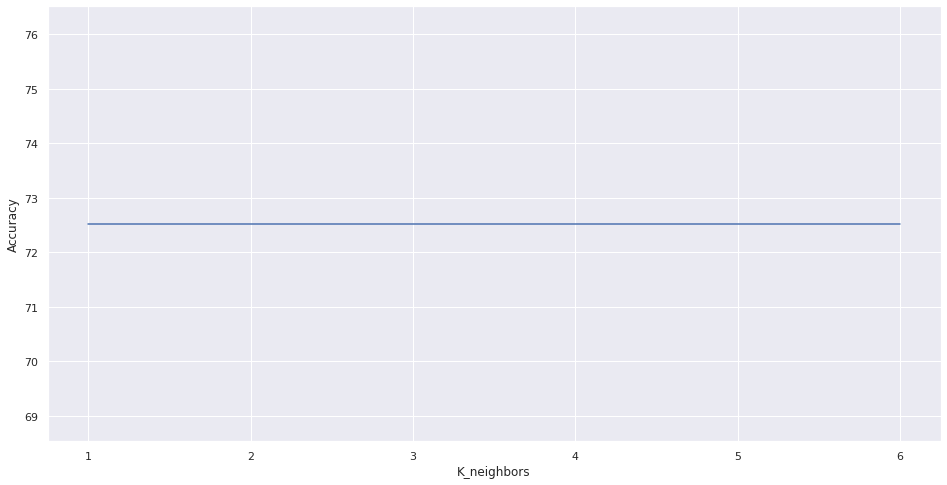

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


X = train[['H_Distance','Year','dayofweek','timeofday','monthofyear']]
y = fare
k = 6


# Split into training and test set
X_train, X_test, y_train, y_test = cross(X,y,10,random.randint(0,9))

neighbors = np.arange(1, k+1)
test_accuracy = np.empty(len(neighbors))

for i in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    test_accuracy[i-1] = knn.score(X_test, y_test)*100

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')

plt.xlabel('K_neighbors')
plt.ylabel('Accuracy')
plt.show()

Preddicting of test set

In [ ]:
y_knn = knn.predict(test[['H_Distance','Year','dayofweek','timeofday','monthofyear']])
y_knn

array([ 9.58333333, 10.41666667,  4.23333333, ...,  7.        ,
        8.75      ,  8.25      ])

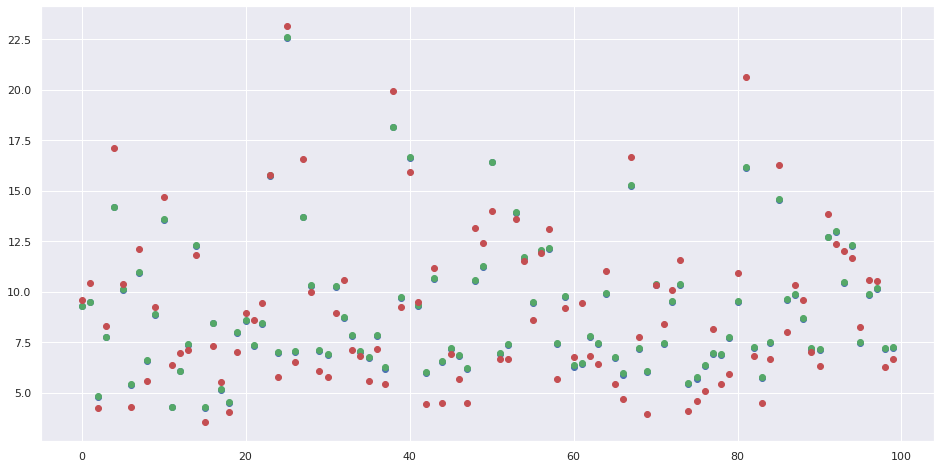

In [ ]:
# Analyzing the first 100 results output by three methods
x = np.arange(100)
plt.scatter(x,y_mat[:100],color='b')
plt.scatter(x,y_sgd[:100],color='g')
plt.scatter(x,y_knn[:100],color='r')
plt.show()

# Start of Part 2: Life Expectancy prediction

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew
import random
import plotly.express as px
import plotly.graph_objs as go
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split


In [ ]:
!kaggle datasets download -d kumarajarshi/life-expectancy-who

life-expectancy-who.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip life-expectancy-who

Archive:  life-expectancy-who.zip
replace Life Expectancy Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Life Expectancy Data.csv  


In [ ]:
data=pd.read_csv("/content/Life Expectancy Data.csv")

Data Cleaning

In [ ]:
data.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
# Null values
data.isnull().sum()


Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
data.dropna(subset=["Life expectancy "],inplace=True)

In [ ]:
def imputer(data):
  for i in data:
    if type(data[i][1]) == np.float64 or type(data[i][1]) == np.int64 :
      data[i].fillna(data[i].mean(),inplace=True)


imputer(data)

In [ ]:
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.00000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2.928000e+03,2928.000000,2928.000000,2928.000000,2928.000000
mean,2007.50000,69.224932,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,38.235394,42.179303,82.548298,5.930163,82.321416,1.747712,7494.210719,1.276454e+07,4.850622,4.881423,0.627419,11.999639
std,4.61056,9.523867,124.292079,118.114450,3.914923,1990.930605,22.531361,11485.970937,19.850184,160.700547,23.340548,2.385478,23.629576,5.085542,13157.128331,5.390628e+07,4.396597,4.484890,0.205131,3.253691
min,2000.00000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.75000,63.100000,74.000000,0.000000,1.107500,4.853964,80.960842,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,578.797095,4.181205e+05,1.600000,1.600000,0.504000,10.300000
50%,2007.50000,72.100000,144.000000,3.000000,4.160000,65.611455,87.000000,17.000000,43.000000,4.000000,93.000000,5.930163,93.000000,0.100000,3112.560501,3.640009e+06,3.400000,3.400000,0.662000,12.100000
75%,2011.25000,75.700000,228.000000,22.000000,7.400000,442.614322,96.000000,362.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7494.210719,1.276454e+07,7.100000,7.200000,0.773000,14.100000
max,2015.00000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



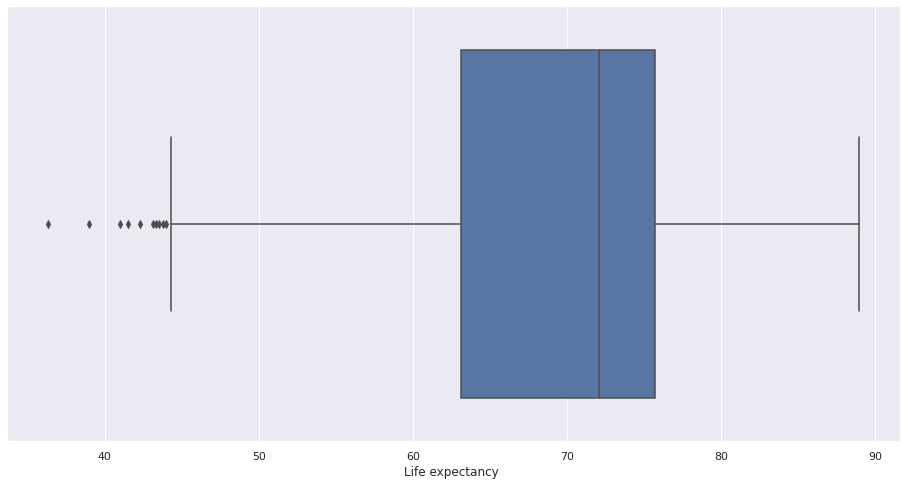

In [ ]:
# Checking target value
sns.boxplot(data['Life expectancy '])

Removing outliers through quantile method

In [ ]:
q1=data['Life expectancy '].quantile(0.25)
q3=data['Life expectancy '].quantile(0.75)
outer=q3+1*(q3-q1)
lower=q1-1*(q3-q1)
def remove_outlier(x):
  if(x>outer):
    return outer
  elif(x<lower):
    return lower
  return x
data['Life expectancy '] = data['Life expectancy '].apply(remove_outlier)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



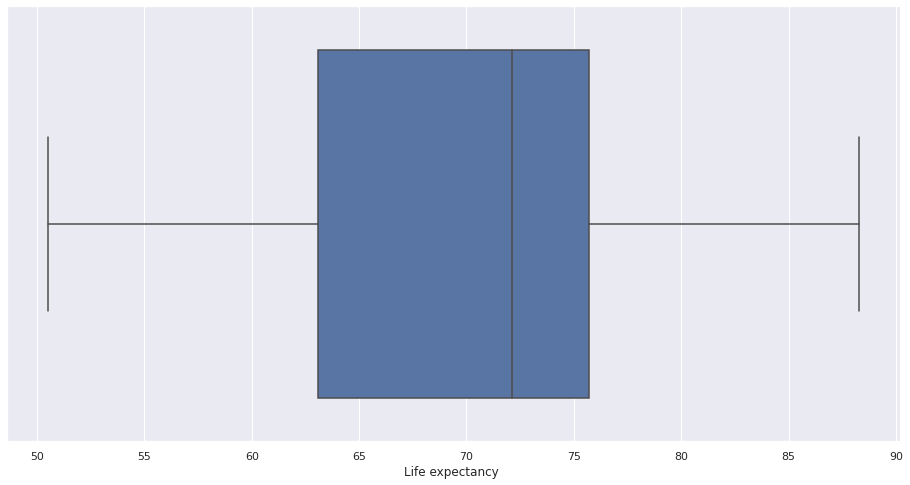

In [ ]:
sns.boxplot(data['Life expectancy '])

The below graph infers that developed nations has a better life expectancy than developing nations

Text(0, 0.5, 'Life Expectancy')

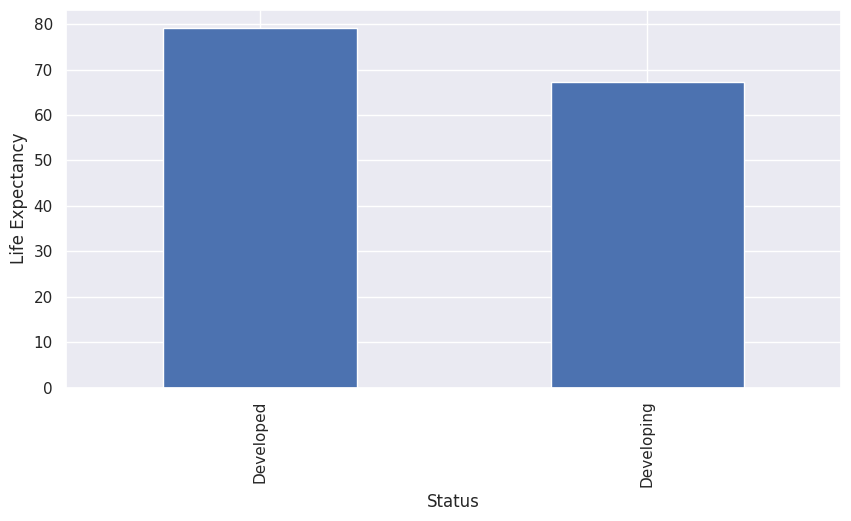

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
data.groupby('Status')['Life expectancy '].mean().plot(kind="bar")
plt.ylabel("Life Expectancy")

Observing the distribution of Life Expectancy

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



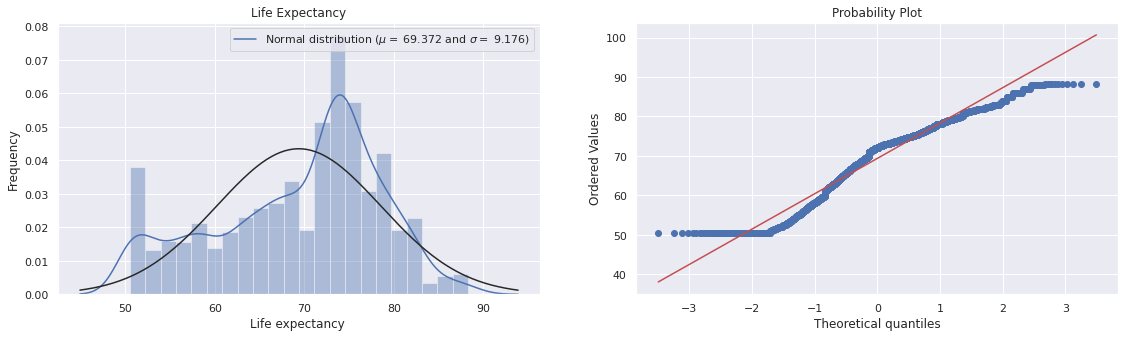

In [ ]:
Life_expectancy=data['Life expectancy ']

(mu, sigma) = norm.fit(Life_expectancy)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 5))
ax1 = sns.distplot(Life_expectancy, fit=norm, ax=ax1)
ax1.legend([f'Normal distribution ($\mu=$ {mu:.3f} and $\sigma=$ {sigma:.3f})'], loc='best')
ax1.set_ylabel('Frequency')
ax1.set_title('Life Expectancy')
ax2 = stats.probplot(Life_expectancy, plot=plt)
f.show()

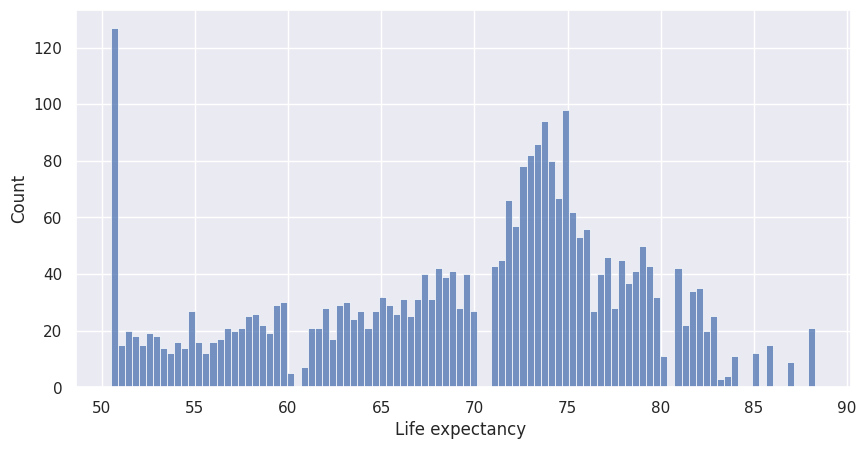

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
sns.histplot(data['Life expectancy '],bins=100)

In [ ]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Life expectancy has increased over the years as health facilities have improved

Text(0, 0.5, 'Life Expectancy')

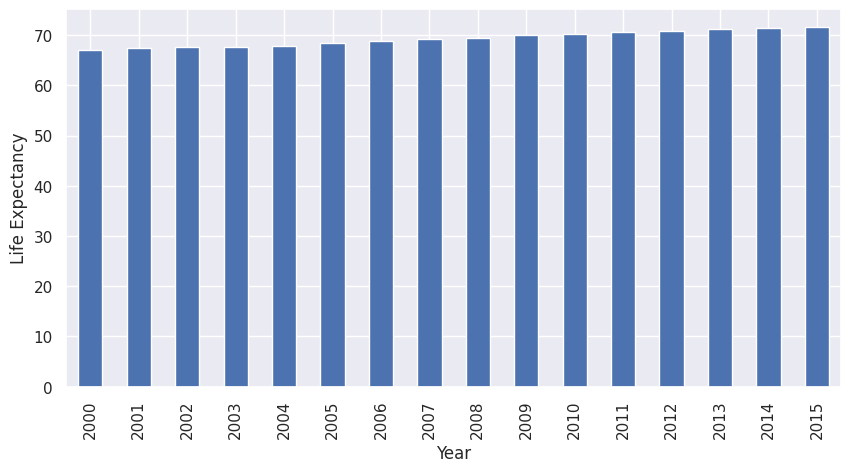

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
data.groupby('Year')['Life expectancy '].mean().plot(kind="bar")
plt.ylabel("Life Expectancy")

Using plotly.express to illustrate Country wise life expectancy over the years

In [ ]:
# Country wise life expectancy
fig=px.line(data.sort_values(by='Year'),x='Year',y='Life expectancy ',animation_frame='Country',animation_group='Year',color='Country',markers=True,template='plotly_dark',title='<b> Country wise Life Expectancy over Years')
fig.show()

For most of countries life expectancy has increased

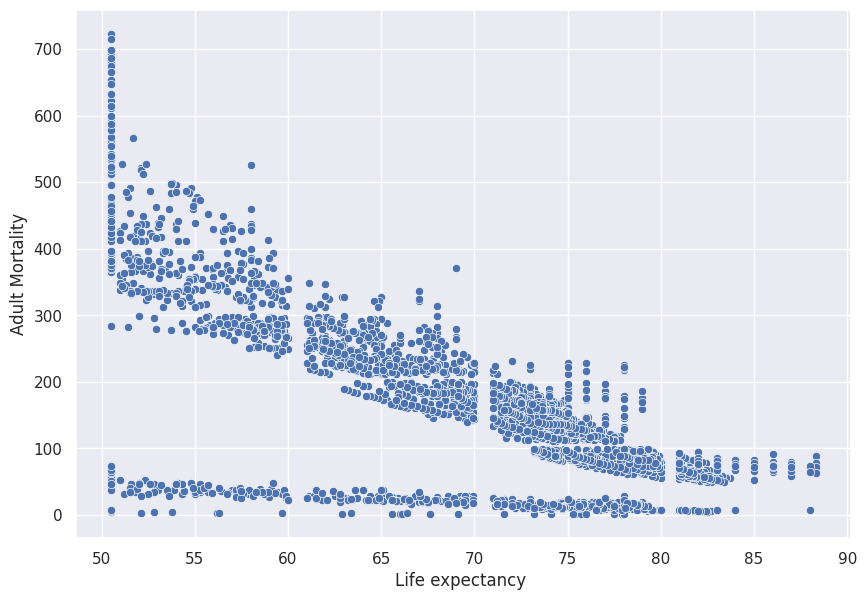

In [ ]:
plt.figure(figsize=(10,7),dpi=100)
sns.scatterplot(data=data,x='Life expectancy ',y='Adult Mortality')
plt.show()

Adult mortality is inversely correlated to life expectancy

In [ ]:
data1=pd.DataFrame(data.groupby('Country')['Life expectancy '].mean().sort_values())
data1

,Life expectancy
Country,
Sierra Leone,50.75000
Angola,51.10625
Lesotho,51.15625
Central African Republic,51.25000
Côte d'Ivoire,51.41250
...,...
Italy,82.14375
Switzerland,82.33125
Iceland,82.44375


Country wise order of average life expectancy

Plotting the above data on globe using plotly.offline

In [ ]:
# choropleth map
from plotly.offline import iplot
data3 = dict(type='choropleth',
            locations=data1.index,
            locationmode='country names',
            z=data1['Life expectancy '],
            text=data1.index,
            colorbar={'title': 'Life Expectancy'},
            colorscale=[[0, 'rgb(225,255,255)'],
                        [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,125,180)'],
                        [0.03, 'rgb(178,223,138)'], [0.10, 'rgb(51,160,44)'],
                        [0.30, 'rgb(251,144,143)'], [0.70, 'rgb(255,255,20)'],
                        [1, 'rgb(210,26,28)']],
            reversescale = False)
layout = dict(title="WHO Life expectancy",
              autosize=False,
              width=800,
              height=800,
              geo=dict(showframe=True, projection={'type': 'van der grinten'}))

choromap = go.Figure(data=[data3], layout=layout)
iplot(choromap, validate=False)

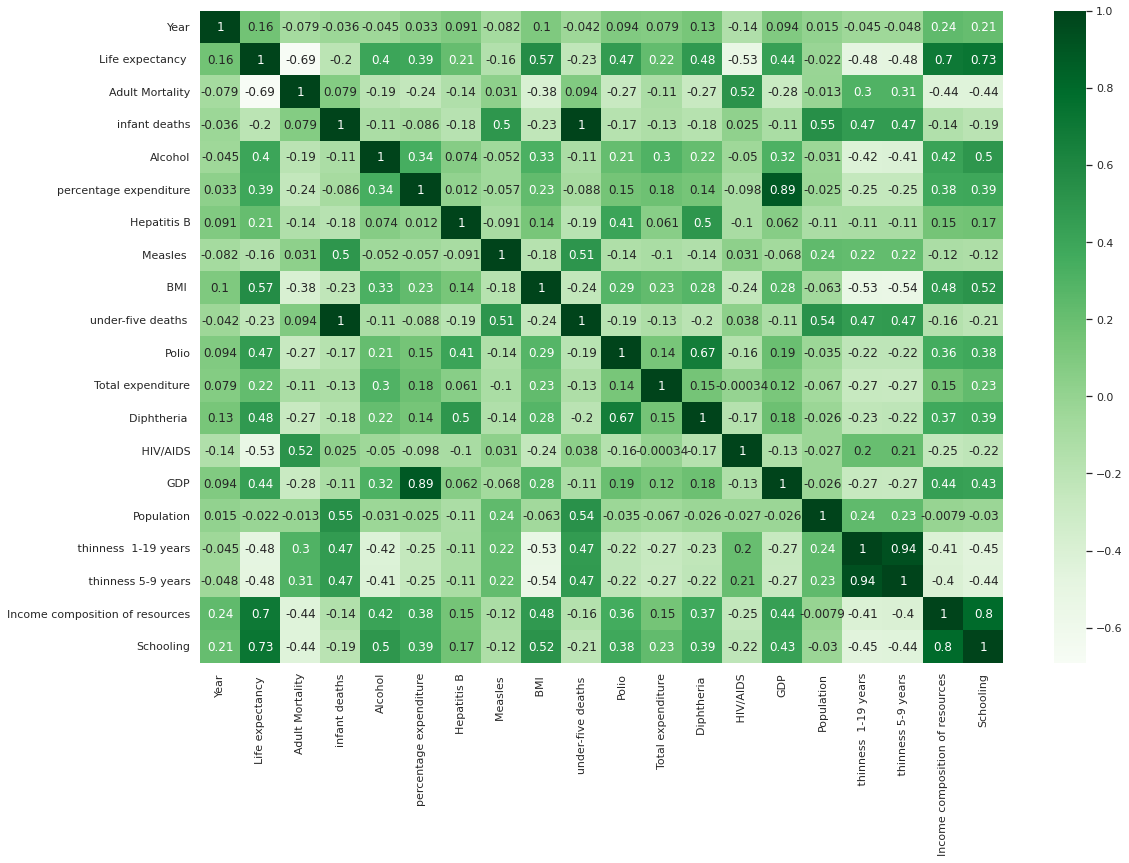

In [ ]:
plt.figure(figsize=(18,12))
sns.heatmap(data.corr(),annot=True,cmap='Greens')
plt.show()

The above heatmap infers that:
1. Schooling, Income composition, GDP, Diptheria, Total expenditure, Polio, BMI, percentage expenditure, Alcohol and Year are positively correlated to life expectancy. Some of features might not be related in real life but in data it shows like Alcohol

2. Adult mortality, thinness, HIV/AIDS, Under 5 deaths, Measles are negatively correlated to life expectancy

In [ ]:
# KS test
from scipy.stats import kstest
numerical_data=data.drop(["Life expectancy ","Country","Year"],axis=1)
numerical_data["Status"]=np.where(numerical_data["Status"]=="Developing",0,1)

for i in numerical_data:
  print("result for {} column is {}".format(i,kstest(numerical_data[i],'norm')))

result for Status column is KstestResult(statistic=0.5, pvalue=0.0)
result for Adult Mortality column is KstestResult(statistic=0.9918195008754738, pvalue=0.0)
result for infant deaths column is KstestResult(statistic=0.5742444035709464, pvalue=0.0)
result for Alcohol column is KstestResult(statistic=0.6414334841157909, pvalue=0.0)
result for percentage expenditure column is KstestResult(statistic=0.7668396579846813, pvalue=0.0)
result for Hepatitis B column is KstestResult(statistic=0.9982606784849428, pvalue=0.0)
result for Measles  column is KstestResult(statistic=0.6094219991993618, pvalue=0.0)
result for  BMI  column is KstestResult(statistic=0.9811537226523659, pvalue=0.0)
result for under-five deaths  column is KstestResult(statistic=0.5892717259753181, pvalue=0.0)
result for Polio column is KstestResult(statistic=0.9986501019683699, pvalue=0.0)
result for Total expenditure column is KstestResult(statistic=0.9314259391010011, pvalue=0.0)
result for Diphtheria  column is KstestRe

pvalue of every attribute is 0. We will try OLS to find out pvalues.

In [ ]:
import statsmodels.api as sm
Y=Life_expectancy
x=numerical_data
x=sm.add_constant(x)
model=sm.OLS(Y,x)
results=model.fit()
print(results.summary())
# From the P values obtained we can drop 3 columns= Population,thinness 5-9 years,percentage expenditure

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     680.8
Date:                Sun, 11 Sep 2022   Prob (F-statistic):               0.00
Time:                        05:19:51   Log-Likelihood:                -8162.9
No. Observations:                2928   AIC:                         1.637e+04
Df Residuals:                    2908   BIC:                         1.649e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



OLS reveals that 3 columns (p>0.05) are thinness 5-9 years, Population, percentage expenditure
Dropping these 3 columns and performing KS test and OLS again

In [ ]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
# KS test
from scipy.stats import kstest
data_drop = data[[' thinness 5-9 years','percentage expenditure','Population']]
numerical_data=data.drop(["Life expectancy ","Country","Year"],axis=1)
numerical_data2=numerical_data.drop(['Population',' thinness 5-9 years','percentage expenditure'],axis=1)
numerical_data2["Status"]=np.where(numerical_data2["Status"]=="Developing",0,1)

for i in numerical_data2:
  print("result for {} column is {}".format(i,kstest(numerical_data2[i],'norm')))

result for Status column is KstestResult(statistic=0.5, pvalue=0.0)
result for Adult Mortality column is KstestResult(statistic=0.9918195008754738, pvalue=0.0)
result for infant deaths column is KstestResult(statistic=0.5742444035709464, pvalue=0.0)
result for Alcohol column is KstestResult(statistic=0.6414334841157909, pvalue=0.0)
result for Hepatitis B column is KstestResult(statistic=0.9982606784849428, pvalue=0.0)
result for Measles  column is KstestResult(statistic=0.6094219991993618, pvalue=0.0)
result for  BMI  column is KstestResult(statistic=0.9811537226523659, pvalue=0.0)
result for under-five deaths  column is KstestResult(statistic=0.5892717259753181, pvalue=0.0)
result for Polio column is KstestResult(statistic=0.9986501019683699, pvalue=0.0)
result for Total expenditure column is KstestResult(statistic=0.9314259391010011, pvalue=0.0)
result for Diphtheria  column is KstestResult(statistic=0.9983085719137251, pvalue=0.0)
result for  HIV/AIDS column is KstestResult(statisti

Nothing seem to be changed here

In [ ]:
Y=Life_expectancy
x=numerical_data2
x=sm.add_constant(x)
model=sm.OLS(Y,x)
results=model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     808.8
Date:                Sun, 11 Sep 2022   Prob (F-statistic):               0.00
Time:                        05:19:51   Log-Likelihood:                -8163.6
No. Observations:                2928   AIC:                         1.636e+04
Df Residuals:                    2911   BIC:                         1.646e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

But here p values have decreased

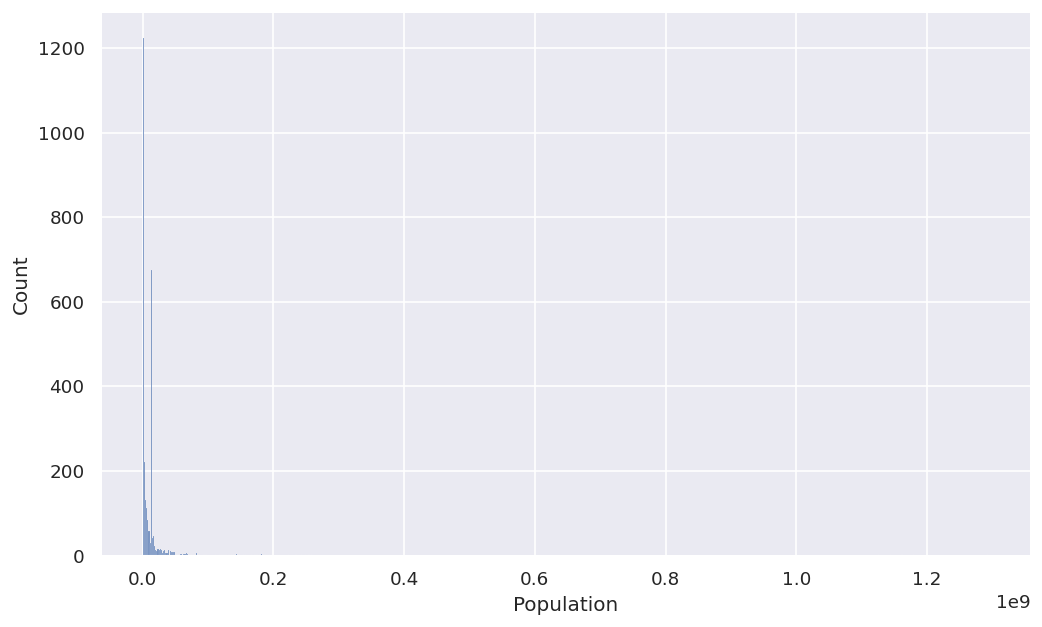

In [ ]:
# Indentifying distribution for the columns removed
plt.figure(figsize=(10,6),dpi=120)
sns.histplot(data_drop['Population'])

It is rightly skewed

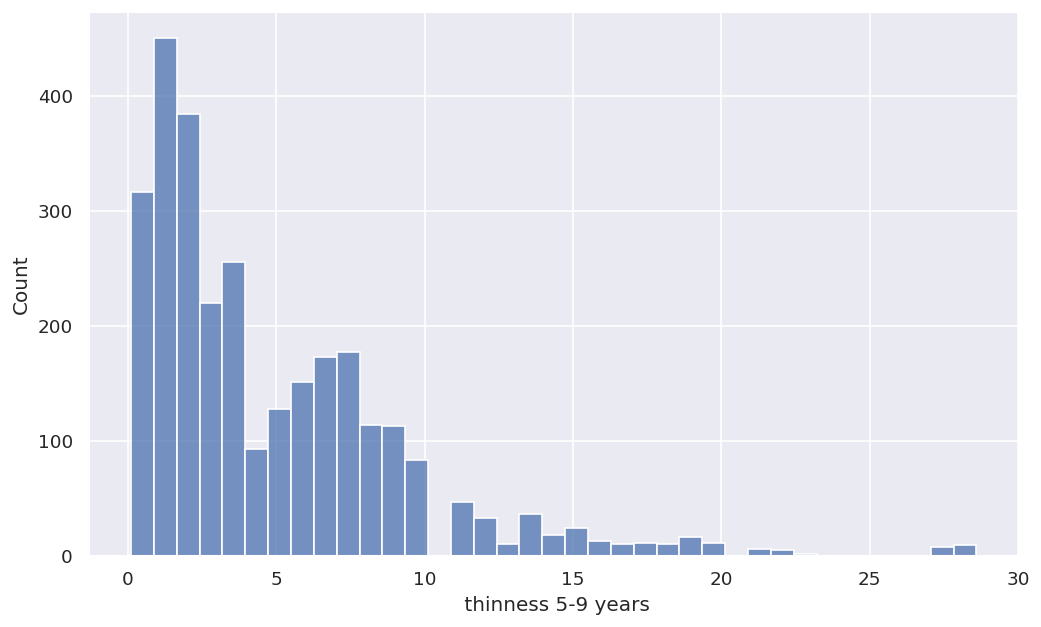

In [ ]:
plt.figure(figsize=(10,6),dpi=120)
sns.histplot(numerical_data[' thinness 5-9 years'])

It is also rightly skewed

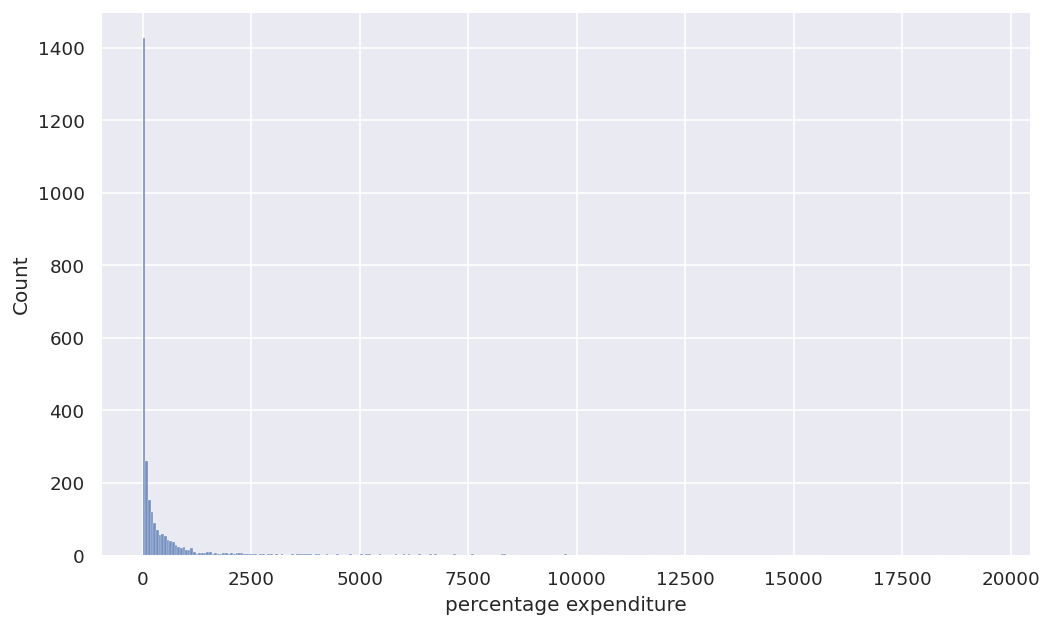

In [ ]:
plt.figure(figsize=(10,6),dpi=120)
sns.histplot(numerical_data['percentage expenditure'])

It is also rightly skewed

In [ ]:
dict1={}
for i in range(0,183):
  dict1[data1.index[i]]=i+1


def priority(x):
  for j in dict1:
    if(j==x):
      return dict1[j]

data["Country"]=data["Country"].apply(priority)

In [ ]:
# Scaling values of countries
def scale(x,x_min,x_max):
  return (x - x_min) / (x_max - x_min)

# Also from the graphs we can infer that the expectancy increases as year increases
data["Country_year"]=data["Country"]*data["Year"]
x_min = min(data["Country_year"])
x_max = max(data["Country_year"])
data["Country_year"] = data["Country_year"].apply(scale,args = (x_min,x_max))

As the year progresses life expectancy increases, so we will sort the countries in order of their life expectancy and multiply the year with it. It will serve as a new attribute for prediction of expectancy

In [ ]:
list1=[data["Country_year"],numerical_data2]
data_scaled=pd.concat(list1,axis=1)
data_scaled.head()

,Country_year,Status,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,Income composition of resources,Schooling
0,0.170364,0,263.0,62,0.01,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,0.479,10.1
1,0.170276,0,271.0,64,0.01,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,0.476,10.0
2,0.170189,0,268.0,66,0.01,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,0.470,9.9
3,0.170102,0,272.0,69,0.01,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,0.463,9.8
4,0.170015,0,275.0,71,0.01,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,0.454,9.5


In [ ]:
data=pd.read_csv("/content/Life Expectancy Data.csv")

In [ ]:
class SimpleImputer:
  def __init__(self):
    pass
  def fit(self, X ,y=None):
    self.X = X
    self.y= y
    self.X.dropna(subset=[y],inplace=True)
    for i in self.X:
      if type(data[i][1]) == np.float64 or type(data[i][1]) == np.int64 :
        self.X[i].fillna(self.X[i].mean(),inplace=True)
    self.transform(self.y)
    self.X["Status"]=np.where(self.X["Status"]=="Developing",1,2)
    dict1={}
    for i in range(0,183):
      dict1[self.X.index[i]]=i+1
    Life =self.X['Life expectancy ']
    self.X = self.X.drop(['Life expectancy '],axis = 1)
    self.X["Country"]=self.X["Country"].apply(priority)
    self.X["Country_year"]=self.X["Country"]*self.X["Year"]
    self.X = self.X.drop(["Country","Year",'Population',' thinness 5-9 years','percentage expenditure'],axis=1)
    return self.X,Life
  def transform(self, i):
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    outer=q3+1*(q3-q1)
    lower=q1-1*(q3-q1)
    self.X[i].apply(remove_outlier)
    return self


In [ ]:
class StandardScaler:
  def __init__(self):
    pass
  def fit(self, X ,y):
    self.X = X
    self.y= y
    for i in self.X:
      self.transform(i)
    return self.X
  def transform(self, i):
      x_max = max(self.X[i])
      x_min = min(self.X[i])
      self.X[i] = self.X[i].apply(self.scale,args = (x_min,x_max))
      return self.X
  def mean(self,data):
    n = len(data)
    mean = sum(data) / n
    return mean

  def variance(self,data):
    n = len(data)
    mean = sum(data) / n
    deviations = [(x - mean) ** 2 for x in data]
    variance = sum(deviations) / n
    return variance
  def standardize(self,x,mean , std):
    return (x - mean)/std

  def scale(self,x,x_min,x_max):
    return (x - x_min) / (x_max - x_min)


In [ ]:
#Defining Pipeline

class Pipeline:
  def __init__(self,arr):
    self.imputer , self.scaler = arr
  def fit(self ,X,y=None):
    self.imputer = self.imputer[1]
    self.X,life = self.imputer.fit(X,y)
    self.scaler = self.scaler[1]
    self.X = self.scaler.fit(self.X,y)
    return self.X,life


In [ ]:
def cross(data,life,k,v):
  size = data.shape[0] // k
  d = []
  y = []
  for i in range(k-1):
    d.append(data[i*size : (i+1)*size])
    y.append(life[i*size : (i+1)*size])
  d.append(data[(k-1)*size:])
  y.append(life[(k-1)*size:])
  test = d.pop(v)
  y_test = y.pop(v)
  train = pd.concat(d)
  y_train = pd.concat(y)
  return train,test,y_train,y_test

In [ ]:
#Creating Pipelines

num_pipeline = Pipeline([
 ('imputer', SimpleImputer()),
 ('std_scaler', StandardScaler()),
 ])
data,life = num_pipeline.fit(data,"Life expectancy ")

Checkin $R^2$ score of our model

In [ ]:
from sklearn.metrics import r2_score
Y=life
k=10
x_train,x_test,y_train,y_test=cross(data,Y,k,random.randint(0,9))
model=Lasso(alpha=0.001)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(r2_score(y_pred,y_test))


0.9164746155026876


In [ ]:
k =10
def cross(data,life,k,v):
  size = data.shape[0] // k
  d = []
  y = []
  for i in range(k-1):
    d.append(data[i*size : (i+1)*size])
    y.append(life[i*size : (i+1)*size])
  d.append(data[(k-1)*size:])
  y.append(life[(k-1)*size:])
  test = d.pop(v)
  y_test = y.pop(v)
  train = pd.concat(d)
  y_train = pd.concat(y)
  return train,test,y_train,y_test


for i in range(k):
  t1,t2,y_train,y_test = cross(data,Y,k,i)
  model=Lasso(alpha=0.001)
  model.fit(t1,y_train)
  y_pred = model.predict(t2)
  error = np.sqrt(sum((y_pred - y_test)**2) / len(y_pred))
  print(error)


0.05115485190216305
0.0615637844853592
0.05034210059693121
0.05784245309381432
0.04355169727722429
0.04816738221689244
0.05080946285157232
0.06543736055928923
0.05197816413929883
0.059141342035280764


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
for i in range(k):
  t1,t2,y_train,y_test = cross(data,Y,k,i)
  model=Lasso(alpha=0.001)
  model.fit(t1,y_train)
  y_pred = model.predict(t2)
  error = mean_absolute_percentage_error(y_pred,y_test)
  print(error)

0.030220872347684755
0.038249565043363826
0.027133752080806928
0.0301746892891624
0.027832127589451833
0.02606090696787778
0.02958142087675841
0.03394372176969433
0.03986073633004868
0.031933187784051804
